In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment 

In [2]:
read_data=pd.read_excel(r'C:\Users\Anish\Downloads\iris.xls')

In [3]:
read_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
read_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [5]:
read_data.shape

(150, 5)

In [6]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
read_data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
read_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
read_data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

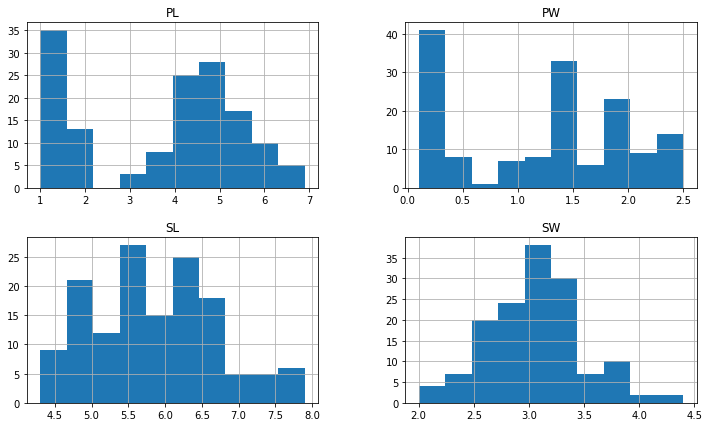

In [10]:
freqgraph = read_data.select_dtypes(include= [float])
freqgraph.hist(figsize=(12,7))
plt.show()

In [11]:
read_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
#for i in ['SL' , 'PL']:
#read_data(i)=read_data(i).fillna(read_data(i).median)

In [13]:
read_data['SW']=read_data['SW'].fillna(read_data['SW'].median())

In [14]:
read_data['SL']=read_data['SL'].fillna(read_data['SL'].median())

In [15]:
read_data['PL']=read_data['PL'].fillna(read_data['PL'].median())

 Here 'SL', 'SW' are normally distributed, where PL has 2 class inside it.//
    Hence take 'median'

In [16]:
read_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [17]:
read_data['PL'].median()

4.35

Text(0.5, 1.0, 'Box plot of SL')

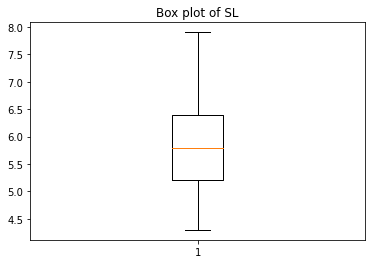

In [18]:
plt.boxplot(read_data['SL'])
plt.title('Box plot of SL')


Text(0.5, 1.0, 'Box plot of PL')

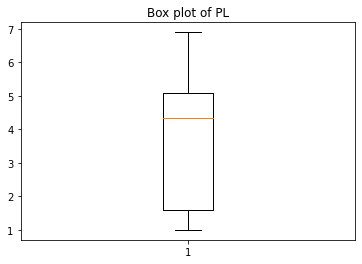

In [19]:
plt.boxplot(read_data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of SW')

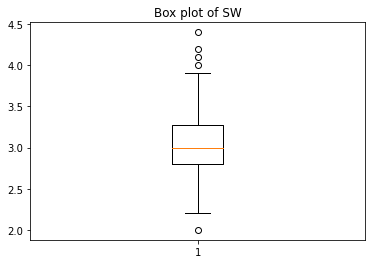

In [20]:
plt.boxplot(read_data['SW'])
plt.title('Box plot of SW')

In [21]:
Q1 = np.percentile(read_data['SW'], 25 ,interpolation='midpoint')
Q2 = np.percentile(read_data['SW'], 50 ,interpolation='midpoint')
Q3 = np.percentile(read_data['SW'], 75 ,interpolation='midpoint')

In [22]:
print(Q1)
print(Q2)
print(Q3)


2.8
3.0
3.25


In [23]:
IQR = Q3-Q1

In [24]:
low_lim = Q1-1.5*IQR
hig_lim = Q3+1.5*IQR

In [25]:
print(low_lim)
print(hig_lim)

2.1249999999999996
3.9250000000000003


In [26]:
outlier = []
for x in read_data['SW']:
    if((x>hig_lim) or (x<low_lim)):
        outlier.append(x)


In [27]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
ind1 = read_data['SW']>hig_lim
read_data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [29]:
ind2 = read_data['SW']<low_lim
read_data.loc[ind2].index

Int64Index([60], dtype='int64')

In [30]:
read_data.drop([14, 15, 32, 33, 60], inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

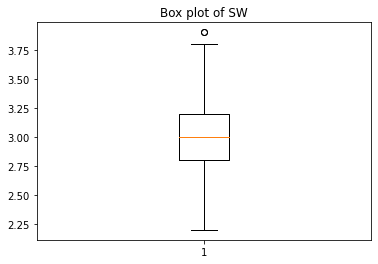

In [31]:
plt.boxplot(read_data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PW')

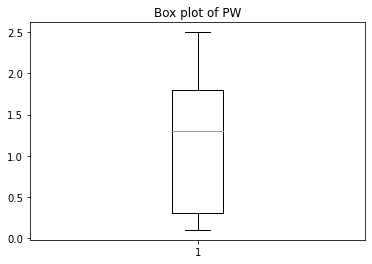

In [32]:
plt.boxplot(read_data['PW'])
plt.title('Box plot of PW')

In [33]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [34]:
read_data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [35]:
read_data.Classification.nunique()

3

In [36]:
read_data.shape

(145, 5)

In [37]:
read_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [38]:
read_data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [39]:
read_data['Classification'].value_counts(normalize=True)

Iris-virginica     0.344828
Iris-versicolor    0.337931
Iris-setosa        0.317241
Name: Classification, dtype: float64

                                      Label Encoder
    
    In ML, usually deals with the dataset which contains more than one columns.these should converted to numbers/words.
    Here Label Encoder converts labels in to numericform as to convert in to machine readable form.
    Here in Target variable it contain more than two classes ,hence i select LabelEncoder.

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
read_data['Classification']=le.fit_transform(read_data['Classification'])

In [43]:
read_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [44]:
read_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


                             Coorelation Matrix

    A corelation matrix is a table showing corelation coefficient between matrix.
    value range -1 to 1.
    the two correlation having high corelation we can neglact one of them

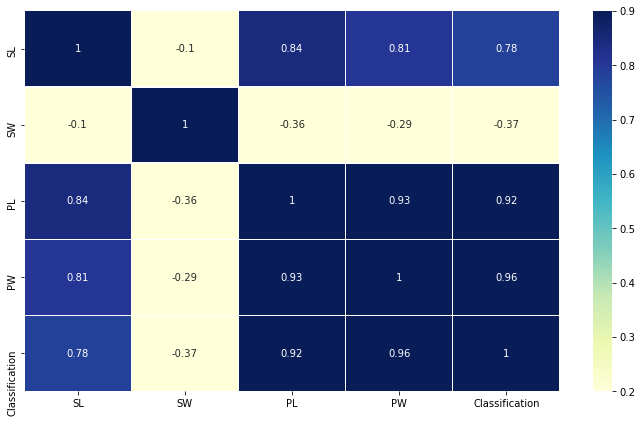

In [45]:
corrmatrix = read_data.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')


Currently we have only 4 variables,so we didnt neglect from it.

# 3. Find out which classification model gives the best result.
(also do random forest algorithm)

In [46]:
read_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

                                
                            Train_Test_Split
    

In [47]:
from sklearn.model_selection import train_test_split

x = read_data.drop('Classification',axis =1)
y = read_data['Classification']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.25)

In [48]:
x_train.shape

(108, 4)

In [49]:
y_test.shape

(37,)


                    1)  DecisionTreeClassifier
     

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
decision = DecisionTreeClassifier()

In [52]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
decision.score(x_train,y_train)

1.0

In [54]:
y_pred=decision.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [56]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))

Accuracy score is: 0.918918918918919


In [57]:
cm=confusion_matrix(y_test,y_pred)
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])

In [58]:
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,8,1
virginica,0,2,12


                     2 LinearRegression

In [59]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,y_pred))

MSE is: 0.05669753428085753


In [61]:
from sklearn.metrics import r2_score
print('r Squared value is:',r2_score(y_test,y_pred))

r Squared value is: 0.925078258271724


                   
                            3)  KNN
                   

In [62]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(7,12)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train,y_train)
    y_pred= Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

In [63]:
acc_values

[0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919]

Text(0, 0.5, 'accuracy')

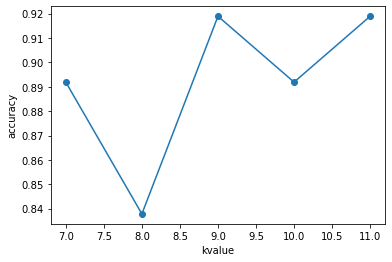

In [64]:
plt.plot(neighbors,acc_values, 'o-' )
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [65]:
Classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
Classifier.fit(x_train,y_train)
y_pred= Classifier.predict(x_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.73      0.89      0.80         9
           2       0.92      0.86      0.89        14

    accuracy                           0.89        37
   macro avg       0.88      0.89      0.88        37
weighted avg       0.90      0.89      0.90        37



In [67]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,average='micro'))
print('recall scoree is:', recall_score(y_test,y_pred,average='macro'))
print('f1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.8918918918918919
precision is: 0.8918918918918919
recall scoree is: 0.8915343915343915
f1 score is: 0.8918918918918919


In [68]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

  
                       Standard Scaling
    

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [72]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,average='micro'))
print('recall scoree is:', recall_score(y_test,y_pred,average='macro'))
print('f1 score is:', f1_score(y_test,y_pred,average='micro'))


Accuracy score is: 0.9459459459459459
precision is: 0.9459459459459459
recall scoree is: 0.9391534391534391
f1 score is: 0.9459459459459459


In [73]:
cm=confusion_matrix(y_test,y_pred)

In [74]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,8,1
virginica,0,1,13


knn 

In [75]:
acc_values = []
neighbors = np.arange(7,12)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train,y_train)
    y_pred= Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

Text(0, 0.5, 'accuracy')

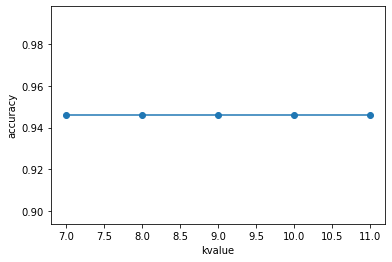

In [76]:
plt.plot(neighbors,acc_values, 'o-' )
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [77]:
Classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
Classifier.fit(x_train,y_train)
y_pred= Classifier.predict(x_test)

In [78]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,average='micro'))
print('recall scoree is:', recall_score(y_test,y_pred,average='macro'))
print('f1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.9459459459459459
precision is: 0.9459459459459459
recall scoree is: 0.9391534391534391
f1 score is: 0.9459459459459459


In [79]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

#####                
                5) LogisticRegression
                

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [81]:
model.fit(x_train, y_train)

LogisticRegression()

In [82]:
y_pred=model.predict(x_test)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.89      0.89         9
           2       0.93      0.93      0.93        14

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [85]:
read_data.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897,1.027586
std,0.816827,0.374354,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


In [86]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,average='micro'))
print('recall scoree is:', recall_score(y_test,y_pred,average='macro'))
print('f1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.9459459459459459
precision is: 0.9459459459459459
recall scoree is: 0.9391534391534391
f1 score is: 0.9459459459459459


In [87]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

                   
                   6) MinMaxScaler
                   

In [88]:
from sklearn import preprocessing


In [89]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [90]:
x = pd.DataFrame(x)

In [91]:
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('r Squared value is:',r2_score(y_test,y_pred))

MSE is: 0.055253654380476774
r Squared value is: 0.9193258275451719


                           
                           7) Normalization
                           

In [93]:
x = read_data.drop('Classification',axis =1)

In [94]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [95]:
x= pd.DataFrame(x)

In [96]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,y_pred))
print('r Squared value is:',r2_score(y_test,y_pred))

MSE is: 0.05525365438047679
r Squared value is: 0.9193258275451719


                            
                            8)Linear SVM
                            

In [98]:
from sklearn.svm import SVC

In [99]:
svm_linear = SVC(kernel = 'linear')

In [100]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [101]:
y_pred = svm_linear.predict(x_test)

In [102]:
print('Accuracy using linear SVM is:',accuracy_score(y_test,y_pred))

Accuracy using linear SVM is: 0.896551724137931


                       
                     9)  Standardizing The Features
                       

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler= StandardScaler()

In [105]:

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [106]:
svm_linear = SVC(kernel = 'linear')

In [107]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [108]:
y_pred = svm_linear.predict(x_test)

In [109]:
print('Accuracy using linear SVM is:',accuracy_score(y_test,y_pred))

Accuracy using linear SVM is: 0.9310344827586207


Here THE Accuracy is before the scaling and after scaling was same,sometimes normalizing values will provide better results.

                           
                           Polynomial SVM

In [110]:
svm_poly = SVC(kernel = 'poly',degree=3)

In [111]:
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [112]:
y_pred = svm_poly.predict(x_test)

In [113]:
print('Accuracy using Polynomial SVM is:',accuracy_score(y_test,y_pred))

Accuracy using Polynomial SVM is: 0.8620689655172413


                            Radial SVM

In [114]:
svm_radial = SVC(kernel = 'rbf')

In [115]:
svm_radial.fit(x_train,y_train)

SVC()

In [116]:
y_pred = svm_radial.predict(x_test)

In [117]:
print('Accuracy using Radial SVM is:',accuracy_score(y_test,y_pred))

Accuracy using Radial SVM is: 0.9310344827586207


                 RandomForest Algorithum


In [118]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(0)

In [119]:
Classifiers = RandomForestClassifier()

In [120]:
Classifiers.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))

Accuracy score is: 0.9310344827586207


In [122]:
y_test.value_counts()

2    11
1     9
0     9
Name: Classification, dtype: int64

In [123]:

confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [124]:
len(y_test)

29

In [125]:
len(x_train)

116

In [126]:
cm=confusion_matrix(y_test,y_pred)

In [127]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,8,1
virginica,0,1,10


In [128]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.2 KB


In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
decision = DecisionTreeClassifier()

In [131]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [132]:
decision.score(x_train,y_train)

1.0

In [133]:
y_pred=decision.predict(x_test)

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [135]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))

Accuracy score is: 0.896551724137931


In [136]:
read_data.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897,1.027586
std,0.816827,0.374354,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [140]:
cm=confusion_matrix(y_test,y_pred)
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,9,0
virginica,0,2,9


In [141]:
decision = DecisionTreeClassifier()

In [142]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [143]:
decision.score(x_train,y_train)

1.0

In [144]:
y_pred=decision.predict(x_test)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [146]:
print('Accuracy score is:', accuracy_score(y_test,y_pred))

Accuracy score is: 0.896551724137931


In [147]:
cm=confusion_matrix(y_test,y_pred)
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,8,1
virginica,0,2,9


#NO accuracy change happend

HERE WE CAN CONCLUDE THAT ACCORDING TO MY POINT OF VIEW(OBSERVATION)
LOGISTIC REGRESSION   KNN

KNN: At first the no of misclassification were 4,after implement logistic regression in KNN, misclassification reduced to 2.
by using standard scaling
    Also the score of
Accuracy score is: 0.9459459459459459
precision is: 0.9459459459459459
recall scoree is: 0.9391534391534391
f1 score is: 0.9459459459459459 is Incresed from a Accuracy score of : 0.8918918918918919 .
        

LOGISTIC REGRESSION :
    Produce results in the form of Binary format
    output should be descrete/categorical
    
    Accuracy score is: 0.9459459459459459
